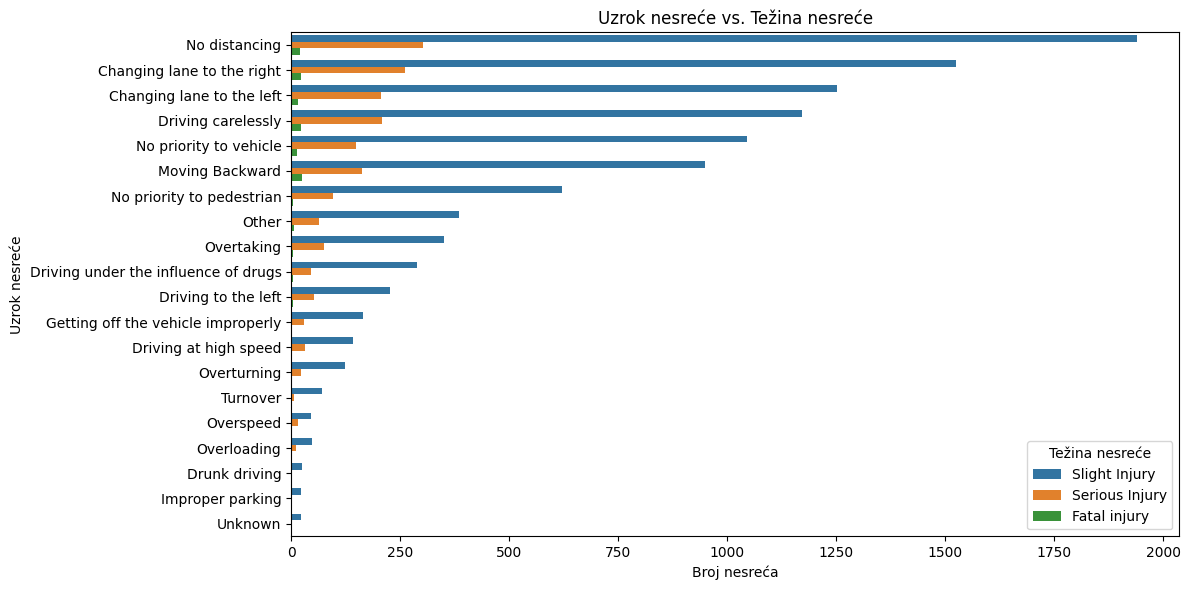

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

df = pd.read_csv("RTA Dataset.csv")
sns.countplot(
    data=df,
    y="Cause_of_accident",
    hue="Accident_severity",
    order=df["Cause_of_accident"].value_counts().index
)
plt.title("Uzrok nesreće vs. Težina nesreće")
plt.xlabel("Broj nesreća")
plt.ylabel("Uzrok nesreće")
plt.legend(title="Težina nesreće")
plt.tight_layout()
plt.show()


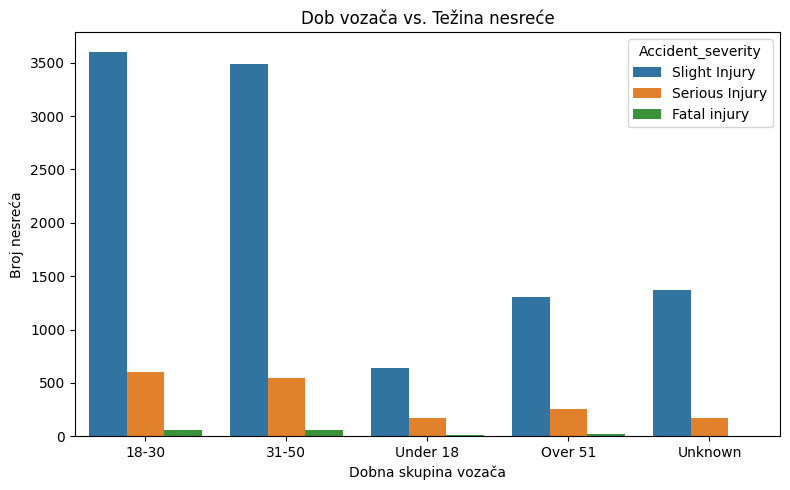

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="Age_band_of_driver",
    hue="Accident_severity"
)
plt.title("Dob vozača vs. Težina nesreće")
plt.xlabel("Dobna skupina vozača")
plt.ylabel("Broj nesreća")
plt.tight_layout()
plt.show()


Korelacija između iskustva vozača i težine nesreće: 0.01


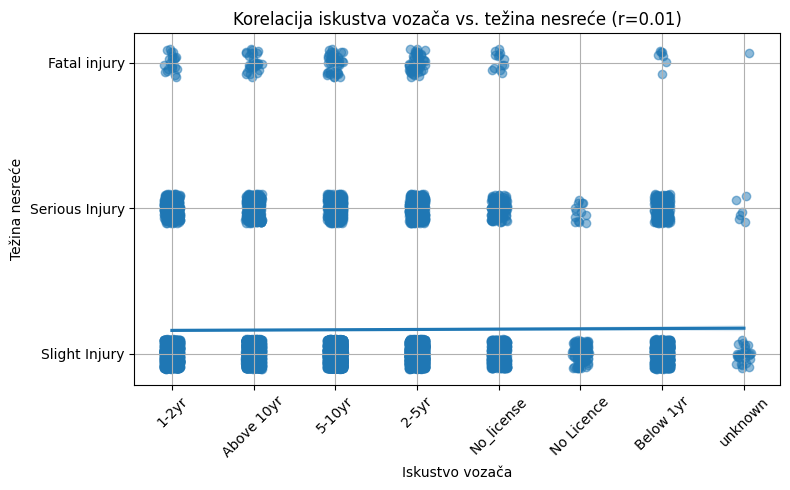

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Popunjavanje vozača bez dozvole
df["Driving_experience_filled"] = df["Driving_experience"].fillna("No_license")

# Sve unikatne vrijednosti iskustva
exp_unique = df["Driving_experience_filled"].unique()
# Mapiranje svake vrijednosti u broj (ordinalno)
experience_mapping = {exp: i for i, exp in enumerate(exp_unique)}
df["Driving_experience_num"] = df["Driving_experience_filled"].map(experience_mapping)

# Popunjavanje težine nesreće (ako ima NaN)
df["Accident_severity_filled"] = df["Accident_severity"].fillna("Unknown")
# Sve unikatne vrijednosti težine nesreće
sev_unique = df["Accident_severity_filled"].unique()
severity_mapping = {sev: i for i, sev in enumerate(sev_unique)}
df["Accident_severity_num"] = df["Accident_severity_filled"].map(severity_mapping)

# Filter da nema NaN
df_corr = df.dropna(subset=["Driving_experience_num", "Accident_severity_num"])
corr = df_corr["Driving_experience_num"].corr(df_corr["Accident_severity_num"])
print(f"Korelacija između iskustva vozača i težine nesreće: {corr:.2f}")

# Scatter + trend line
plt.figure(figsize=(8,5))
sns.regplot(
    x="Driving_experience_num",
    y="Accident_severity_num",
    data=df_corr,
    x_jitter=0.1,
    y_jitter=0.1,
    scatter_kws={"alpha":0.5}
)

# Označavanje originalnih kategorija
plt.xticks(list(experience_mapping.values()), list(experience_mapping.keys()), rotation=45)
plt.yticks(list(severity_mapping.values()), list(severity_mapping.keys()))
plt.xlabel("Iskustvo vozača")
plt.ylabel("Težina nesreće")
plt.title(f"Korelacija iskustva vozača vs. težina nesreće (r={corr:.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x="Weather_conditions",
    hue="Accident_severity",
    order=df["Weather_conditions"].value_counts().index
)
plt.title("Vremenski uvjeti vs. Težina nesreće")
plt.xlabel("Vremenski uvjeti")
plt.ylabel("Broj nesreća")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

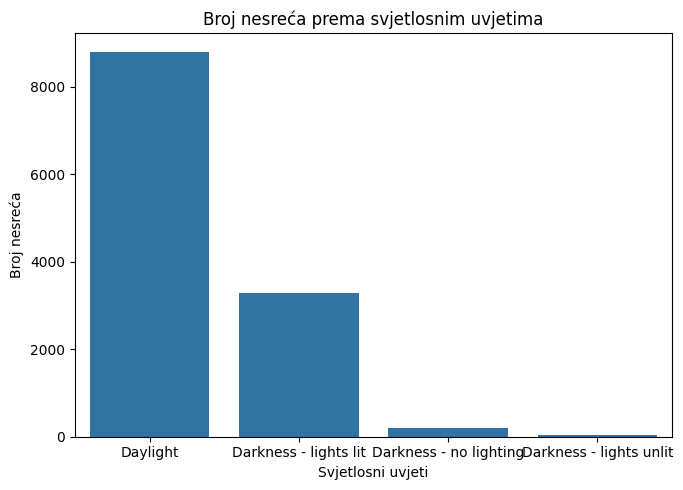

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x="Light_conditions"
)
plt.title("Broj nesreća prema svjetlosnim uvjetima")
plt.xlabel("Svjetlosni uvjeti")
plt.ylabel("Broj nesreća")
plt.tight_layout()
plt.show()


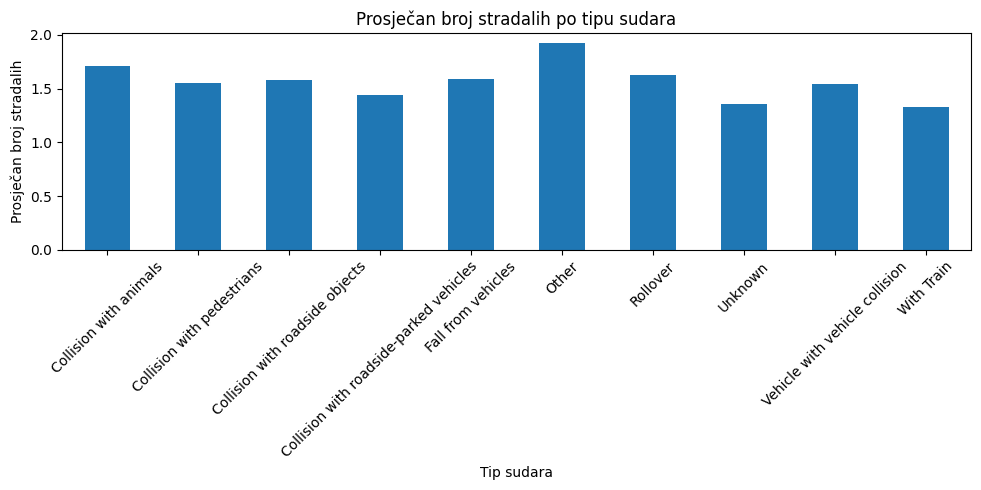

In [12]:
df.groupby("Type_of_collision")["Number_of_casualties"].mean().plot(
    kind="bar",
    figsize=(10,5)
)

plt.title("Prosječan broj stradalih po tipu sudara")
plt.xlabel("Tip sudara")
plt.ylabel("Prosječan broj stradalih")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


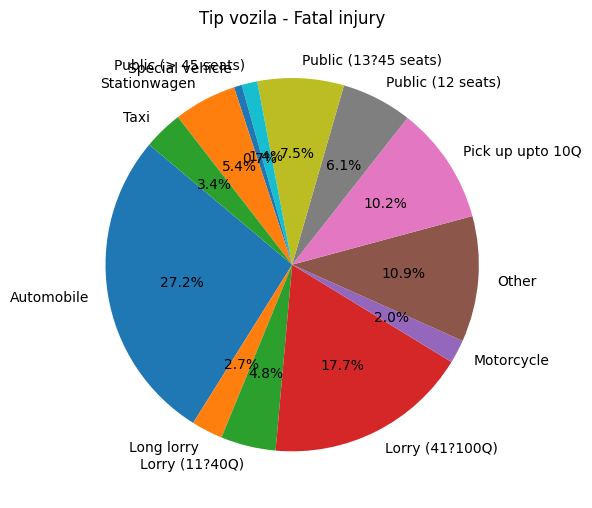

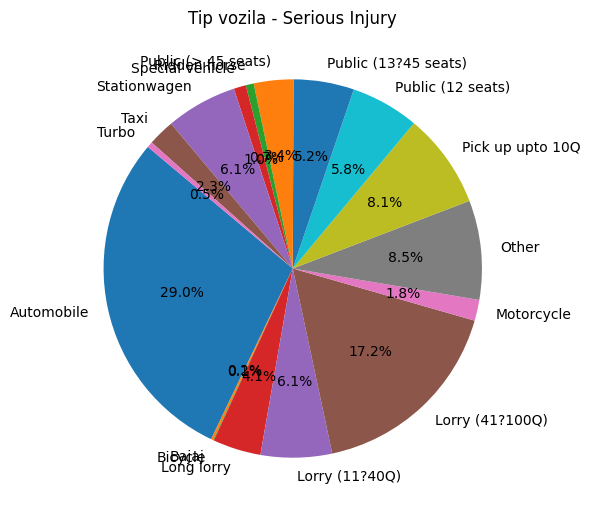

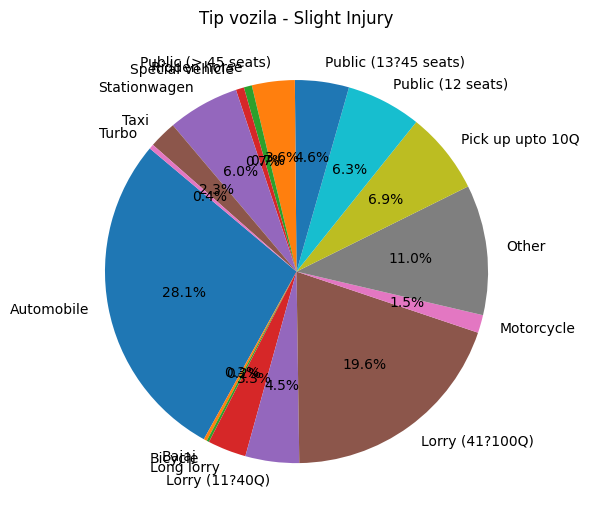

In [14]:
import matplotlib.pyplot as plt

vehicle_severity = df.groupby(
    ["Accident_severity", "Type_of_vehicle"]
).size()

for severity in vehicle_severity.index.levels[0]:
    data = vehicle_severity[severity]

    plt.figure(figsize=(6,6))
    plt.pie(
        data,
        labels=data.index,
        autopct="%1.1f%%",
        startangle=140
    )
    plt.title(f"Tip vozila - {severity}")
    plt.tight_layout()
    plt.show()


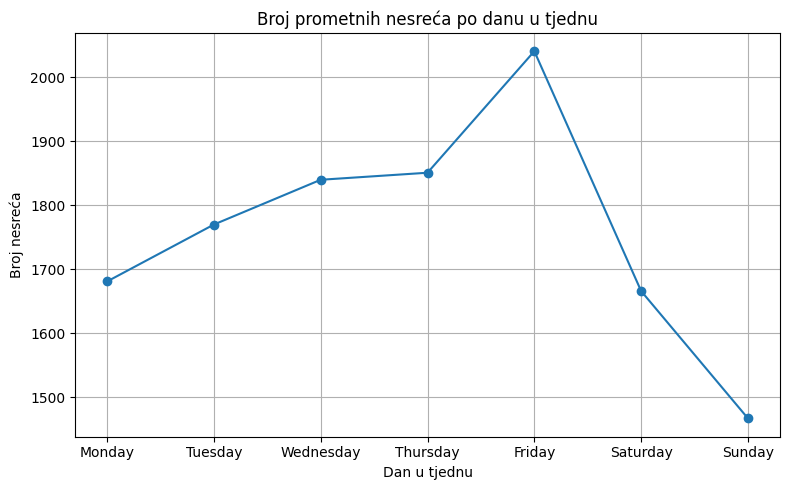

In [15]:
import matplotlib.pyplot as plt

# Redoslijed dana u tjednu (prilagodi ako su nazivi drugačiji)
day_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

# Broj nesreća po danu
day_counts = (
    df["Day_of_week"]
    .value_counts()
    .reindex(day_order)
)

# Line chart
plt.figure(figsize=(8,5))
plt.plot(day_counts.index, day_counts.values, marker="o")

plt.title("Broj prometnih nesreća po danu u tjednu")
plt.xlabel("Dan u tjednu")
plt.ylabel("Broj nesreća")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_11668\4247430710.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour


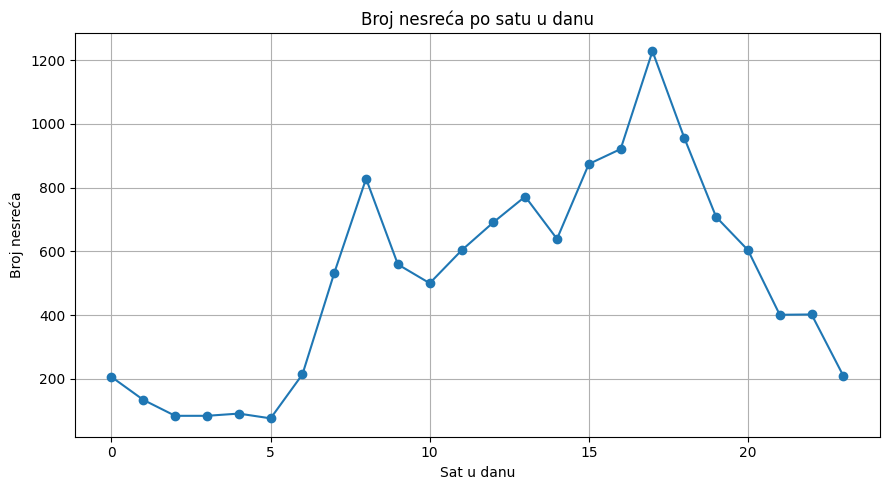

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Ako je Time u formatu HH:MM
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour

hour_counts = df["Hour"].value_counts().sort_index()

plt.figure(figsize=(9,5))
plt.plot(hour_counts.index, hour_counts.values, marker="o")
plt.title("Broj nesreća po satu u danu")
plt.xlabel("Sat u danu")
plt.ylabel("Broj nesreća")
plt.grid(True)
plt.tight_layout()
plt.show()


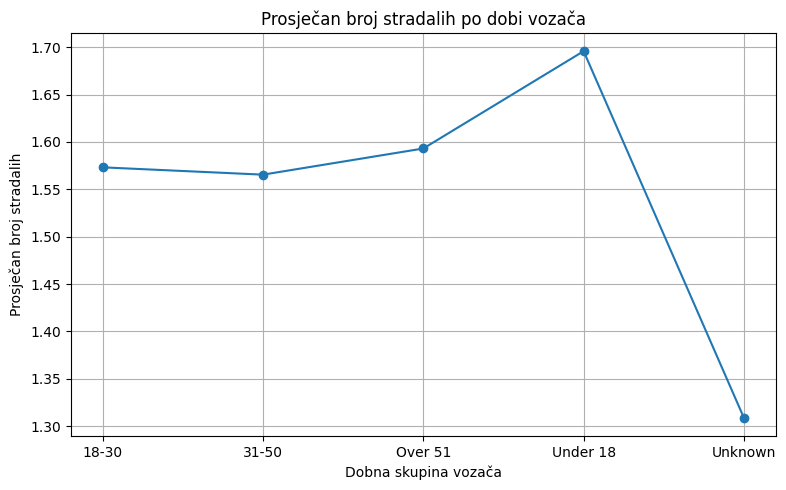

In [17]:
age_casualties = (
    df.groupby("Age_band_of_driver")["Number_of_casualties"]
    .mean()
)

plt.figure(figsize=(8,5))
plt.plot(age_casualties.index, age_casualties.values, marker="o")
plt.title("Prosječan broj stradalih po dobi vozača")
plt.xlabel("Dobna skupina vozača")
plt.ylabel("Prosječan broj stradalih")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
import matplotlib.pyplot as plt

experience_order = [
    "Below 1yr",
    "1-2yr",
    "2-5yr",
    "5-10yr",
    "Above 10yr"
]

exp_casualties = (
    df.groupby("Driving_experience")["Number_of_casualties"]
    .mean()
    .reindex(experience_order)
)



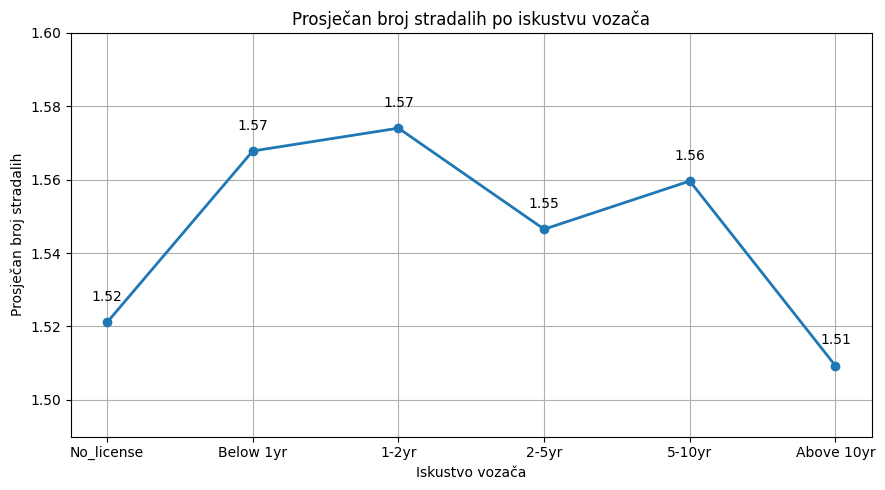

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Popunjavanje i mapiranje iskustva vozača
df["Driving_experience_filled"] = df["Driving_experience"].fillna("No_license")
exp_order = ["No_license","Below 1yr","1-2yr","2-5yr","5-10yr","Above 10yr"]

# Grupiranje po iskustvu i prosjek stradalih
exp_avg = df.groupby("Driving_experience_filled")["Number_of_casualties"].mean().reindex(exp_order)

# Line chart
plt.figure(figsize=(9,5))
plt.plot(exp_avg.index, exp_avg.values, marker="o", linewidth=2, color='tab:blue')

# Dodavanje brojeva iznad točaka
for x, y in zip(exp_avg.index, exp_avg.values):
    plt.text(x, y + 0.005, f"{y:.2f}", ha='center', va='bottom')

plt.title("Prosječan broj stradalih po iskustvu vozača")
plt.xlabel("Iskustvo vozača")
plt.ylabel("Prosječan broj stradalih")
plt.grid(True)

# Proširenje y-osi
y_min = 1.49        # minimalna vrijednost y-osi
y_max = 1.6  # 20% više od maksimuma za vizualni razmak
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


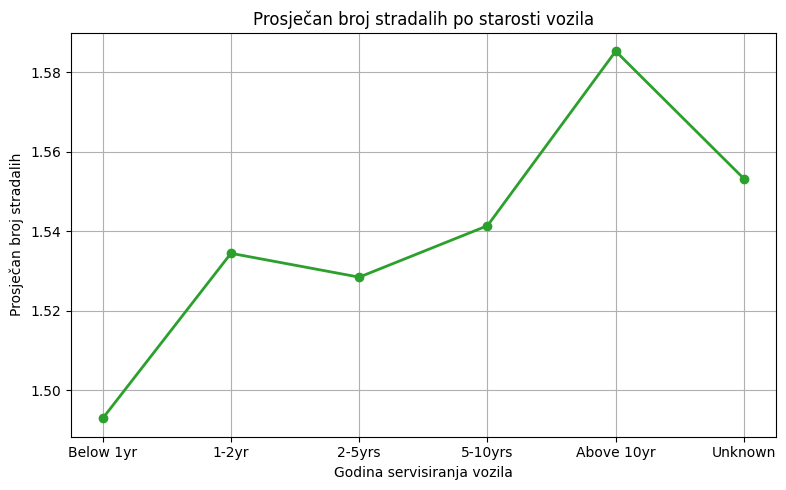

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Grupiranje po starosti vozila
vehicle_age_avg = df.groupby("Service_year_of_vehicle")["Number_of_casualties"].mean()

# Prebacimo "Below 1yr" na početak, ostatak ostaje po sort_index
other_ages = vehicle_age_avg.index[vehicle_age_avg.index != "Below 1yr"]
vehicle_age_avg = vehicle_age_avg.reindex(["Below 1yr"] + list(other_ages))

plt.figure(figsize=(8,5))
plt.plot(vehicle_age_avg.index, vehicle_age_avg.values, marker="o", linewidth=2, color='tab:green')
plt.title("Prosječan broj stradalih po starosti vozila")
plt.xlabel("Godina servisiranja vozila")
plt.ylabel("Prosječan broj stradalih")
plt.grid(True)
plt.tight_layout()
plt.show()
